In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Store Sales.csv', parse_dates=['Order Date', 'Ship Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [4]:
df.rename(columns={'Order Date':'OrderDate','Ship Date':'ShipDate','Customer Name': 'CustomerName','Postal Code':'PostalCode'}, inplace=True)

In [5]:
df['Ship_Delay'] = df.ShipDate - df.OrderDate
df

,Row ID,Order ID,OrderDate,ShipDate,Ship Mode,Customer ID,CustomerName,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship_Delay
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319 days
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319 days
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319 days


In [6]:
df['Ship_Delay_01'] = df.Ship_Delay.astype('str')
df

,Row ID,Order ID,OrderDate,ShipDate,Ship Mode,Customer ID,CustomerName,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship_Delay,Ship_Delay_01
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days,92 days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days,92 days
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days,-173 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days,-23 days
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days,-23 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days,7 days
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319 days,-319 days
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319 days,-319 days
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319 days,-319 days


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   OrderDate      9800 non-null   datetime64[ns] 
 3   ShipDate       9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   CustomerName   9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  PostalCode     9789 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product ID     9800 non-null   object         
 14  Category       9800 non-null   object         
 15  Sub-

In [8]:
df['Ship_Delay_01'] =df.Ship_Delay_01.str.replace('\D', "", regex=True)
df

,Row ID,Order ID,OrderDate,ShipDate,Ship Mode,Customer ID,CustomerName,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship_Delay,Ship_Delay_01
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days,92
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days,173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days,23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days,7
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319 days,319
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319 days,319
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319 days,319


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   OrderDate      9800 non-null   datetime64[ns] 
 3   ShipDate       9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   CustomerName   9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  PostalCode     9789 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product ID     9800 non-null   object         
 14  Category       9800 non-null   object         
 15  Sub-

In [10]:
df['Ship_Delay_01'] = df.Ship_Delay_01.astype('int')
df

,Row ID,Order ID,OrderDate,ShipDate,Ship Mode,Customer ID,CustomerName,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship_Delay,Ship_Delay_01
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days,92
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days,173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days,23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days,7
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319 days,319
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319 days,319
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319 days,319


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9800 non-null   int64          
 1   Order ID       9800 non-null   object         
 2   OrderDate      9800 non-null   datetime64[ns] 
 3   ShipDate       9800 non-null   datetime64[ns] 
 4   Ship Mode      9800 non-null   object         
 5   Customer ID    9800 non-null   object         
 6   CustomerName   9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  PostalCode     9789 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product ID     9800 non-null   object         
 14  Category       9800 non-null   object         
 15  Sub-

In [12]:
df['WeekDay'] = df.OrderDate.dt.weekday
df

,Row ID,Order ID,OrderDate,ShipDate,Ship Mode,Customer ID,CustomerName,Segment,Country,City,...,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship_Delay,Ship_Delay_01,WeekDay
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days,92,4
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days,92,4
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days,173,2
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days,23,3
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days,7,6
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319 days,319,3
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319 days,319,3
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319 days,319,3


In [13]:
df.WeekDay.unique()

array([4, 2, 3, 6, 1, 0, 5], dtype=int64)

In [61]:
df.WeekDay.replace({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, inplace=True)

In [15]:
df['Year']=df.OrderDate.dt.year
df['Month']=df.OrderDate.dt.month
df['Day']=df.OrderDate.dt.day

In [60]:
df['WeekDay'] = df.OrderDate.dt.day_of_week

AttributeError: 'DataFrame' object has no attribute 'OrderDate'

In [19]:
df.rename(columns={'Order Date': 'OrderDate','Ship Date':'ShipDate','Customer Name': 'CustomerName','Postal Code':'PostalCode'}, inplace=True)

In [21]:
df['Year']=df.OrderDate.dt.year
df['Month']=df.OrderDate.dt.month
df['Day']=df.OrderDate.dt.day

In [23]:
df.drop(columns=['OrderDate'], inplace=True)

In [27]:
df.drop(columns=['Product ID'], inplace=True)

### What is the overall sales trend for the online store over the years? Are there any noticeable patterns or seasonality?

In [28]:
yearly_sales = df.groupby(df['Year'])['Sales'].sum()


In [29]:
yearly_sales

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

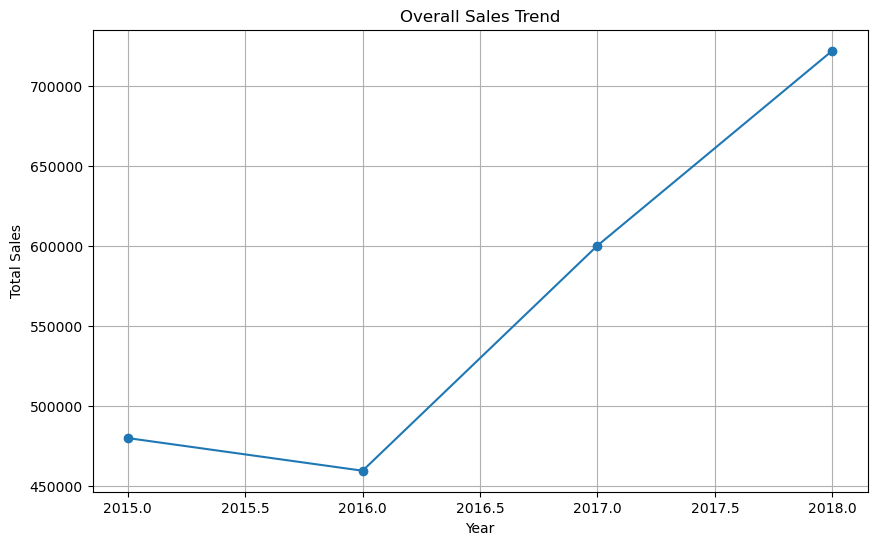

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Overall Sales Trend')
plt.grid(True)
plt.show()


In [31]:
unique_categories = df['Category'].unique()
print(unique_categories)


['Furniture' 'Office Supplies' 'Technology']


### Which product categories and sub-categories generate the most sales? Are there any specific products that stand out in terms of sales performance?

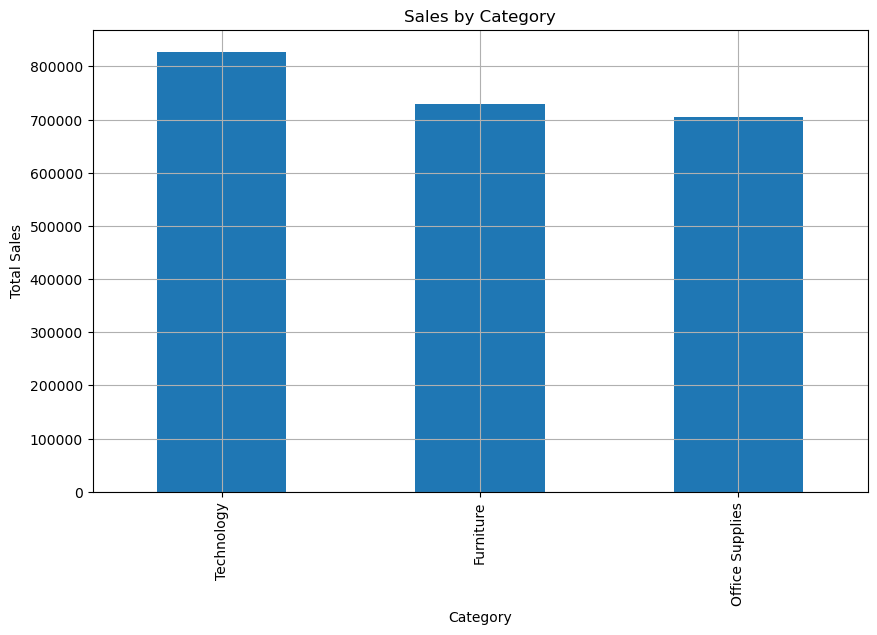

In [32]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales by Category')
plt.grid(True)
plt.show()


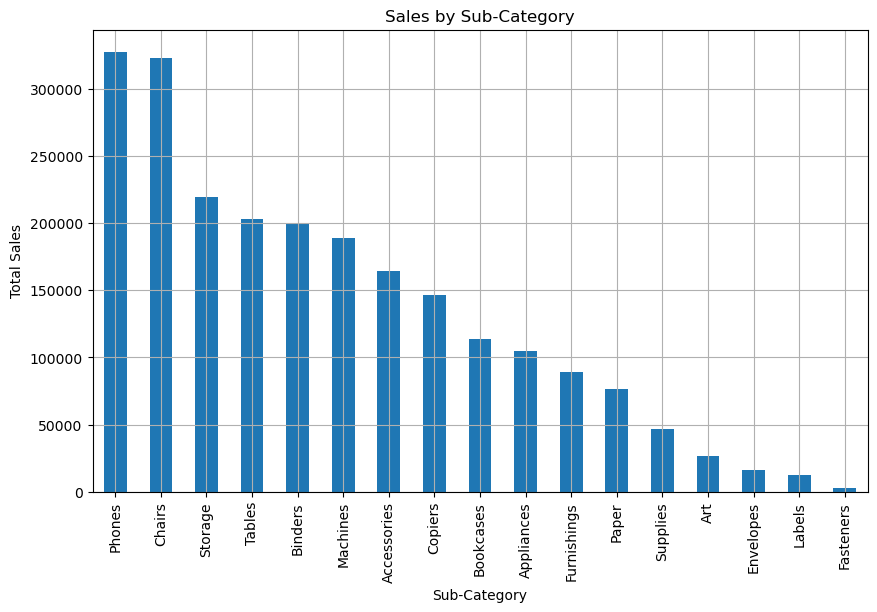

In [33]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sub_category_sales.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sales by Sub-Category')
plt.grid(True)
plt.show()


### Which shipping mode is the most popular among customers? Is there a correlation between the shipping mode and sales?

In [34]:
shipping_mode_counts = df['Ship Mode'].value_counts()

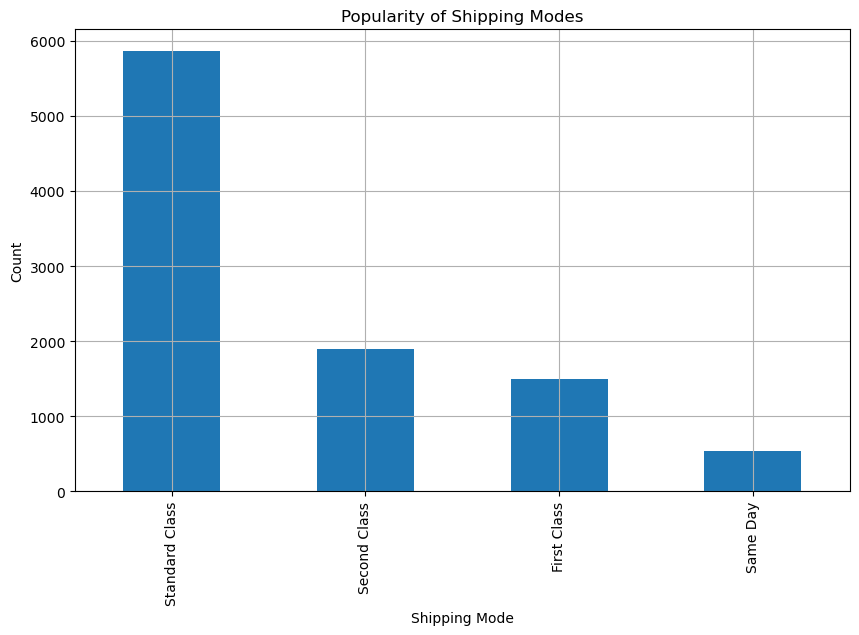

In [35]:
plt.figure(figsize=(10, 6))
shipping_mode_counts.plot(kind='bar')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.title('Popularity of Shipping Modes')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

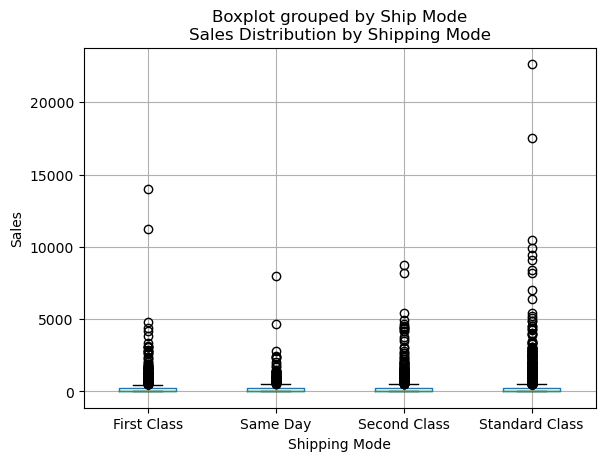

In [36]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Sales', by='Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.title('Sales Distribution by Shipping Mode')
plt.grid(True)
plt.show()


### Is there a correlation between the day of the week and sales? Do certain days of the week consistently generate higher sales than others?

In [42]:
df.WeekDay.replace({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, inplace=True)

In [44]:

daily_sales = df.groupby('WeekDay')['Sales'].sum()


In [46]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [47]:
daily_sales = daily_sales.reindex(weekdays)


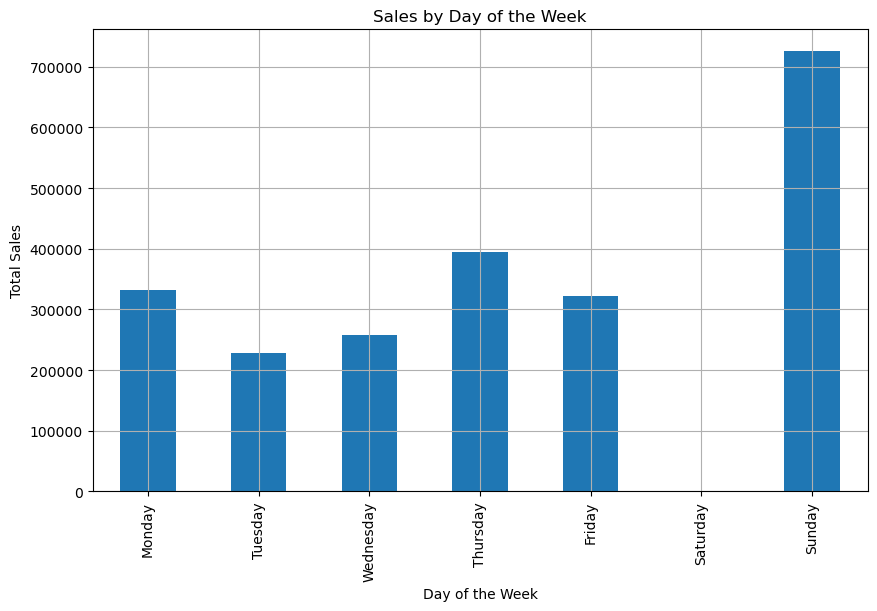

In [48]:
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales by Day of the Week')
plt.grid(True)
plt.show()


### What is the distribution of sales across different regions, cities, and states? Are there any geographical areas that stand out in terms of sales performance?

In [54]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)


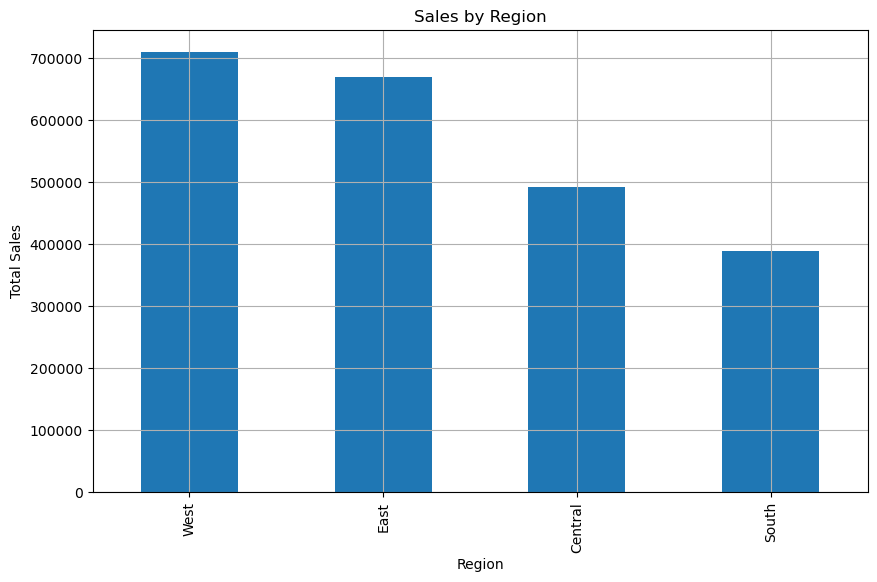

In [55]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.grid(True)
plt.show()


In [56]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)


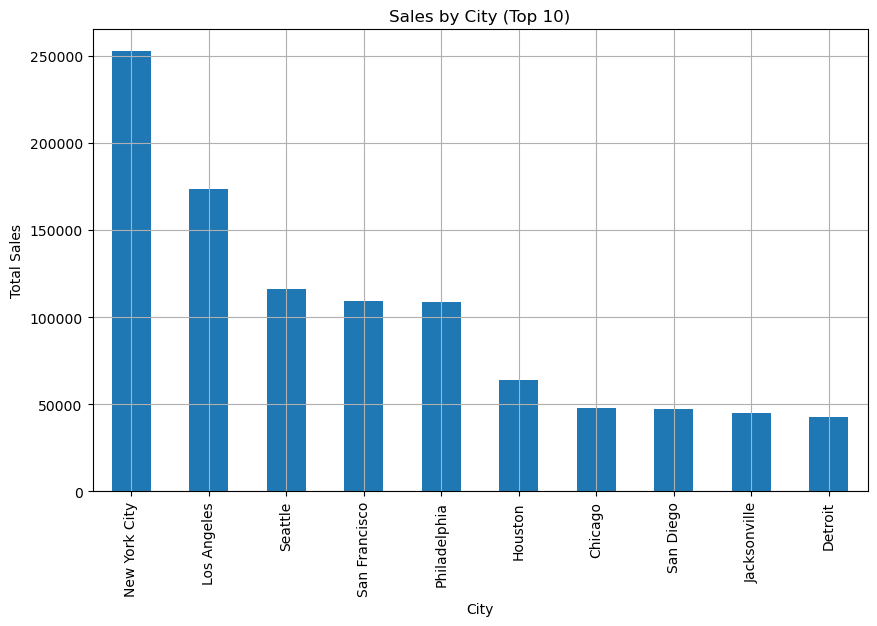

In [57]:
plt.figure(figsize=(10, 6))
city_sales[:10].plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Sales by City (Top 10)')
plt.grid(True)
plt.show()


In [58]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)


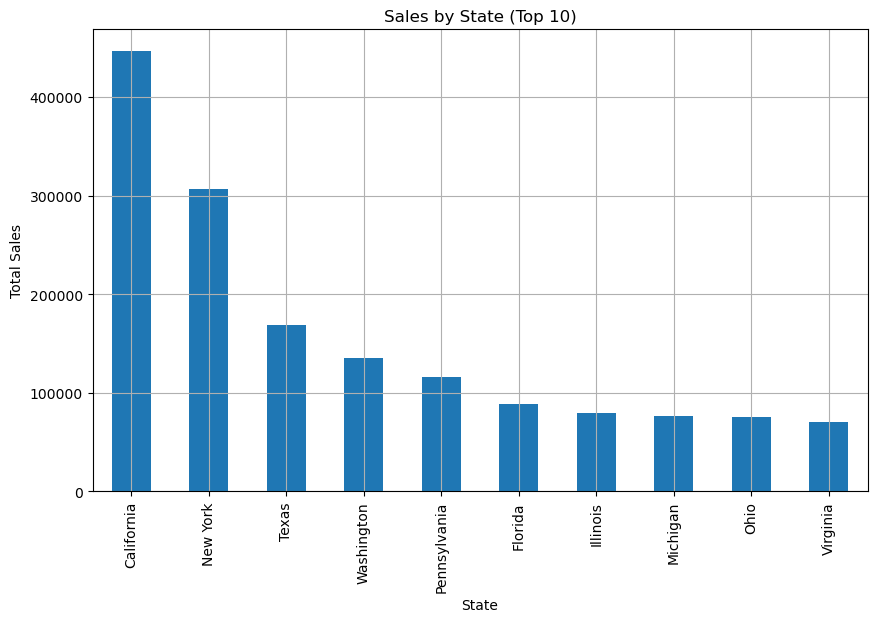

In [59]:
plt.figure(figsize=(10, 6))
state_sales[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales by State (Top 10)')
plt.grid(True)
plt.show()


### Which month or months have the highest sales? Are there any specific factors or events that contribute to these spikes?

In [62]:
monthly_sales = df.groupby('Month')['Sales'].sum()


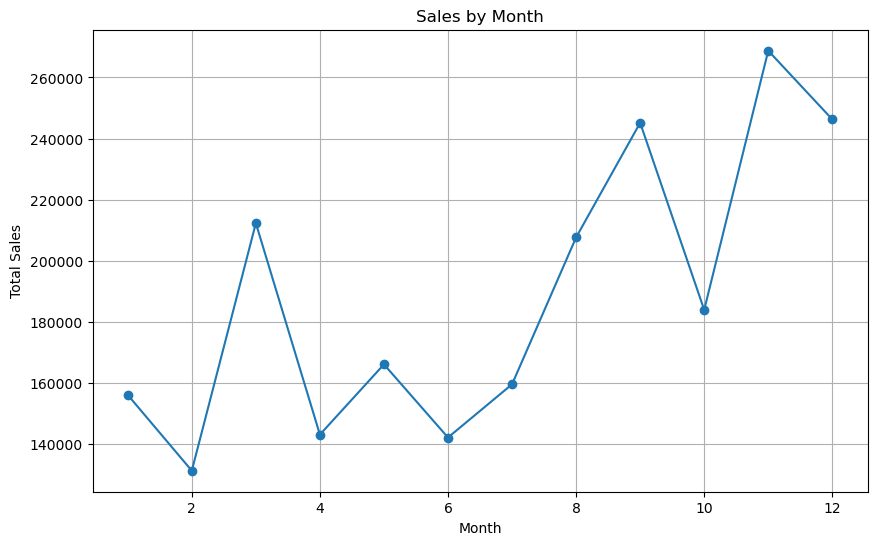

In [63]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.grid(True)
plt.show()


### Can we identify any outliers or anomalies in the sales data? Are there any specific instances where sales deviate significantly from the norm?

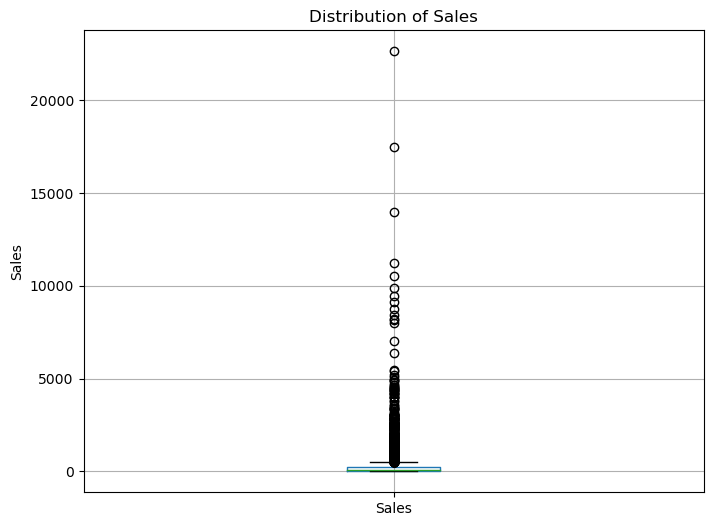

In [65]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Sales')
plt.ylabel('Sales')
plt.title('Distribution of Sales')
plt.grid(True)
plt.show()


In [66]:
df['Sales_zscore'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()


In [67]:
threshold = 3


In [68]:
outliers = df[df['Sales_zscore'] > threshold]


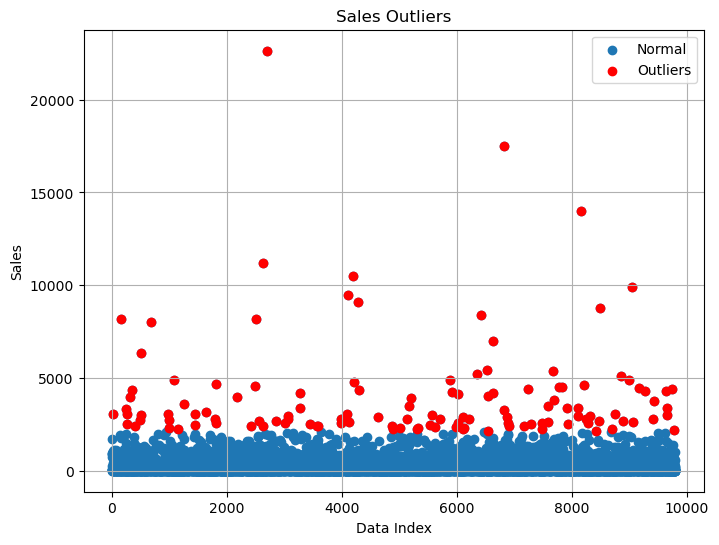

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Sales'], label='Normal')
plt.scatter(outliers.index, outliers['Sales'], color='r', label='Outliers')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.title('Sales Outliers')
plt.legend()
plt.grid(True)
plt.show()
